In [21]:
import os
import pandas as pd

DATADIR = "DB_NG"
DATAFILE = "Marcha - João Vitor Galeno Araújo - Dia 17.04.29 as 18.23_data.txt"

datafile = os.path.join(DATADIR, DATAFILE)
df = pd.read_csv(datafile, sep=",", skiprows=1, header=None, names=['Time', 'VL', 'GM', 'SM', 
                                                                    'BF'])

df = df.dropna()

df.head()

,Time,VL,GM,SM,BF
0,0.0000,926.642159,315.059689,1200.168844,1009.085746
1,0.0005,928.046057,306.636303,1201.572738,1009.085746
2,0.0010,915.410981,315.059689,1204.380527,1021.720824
3,0.0015,928.046057,313.655791,1205.784422,1011.893541
4,0.0020,925.238262,316.463586,1197.361055,1007.681848


In [22]:
import numpy as np 
df_cm = df
df_cm['Time'] = df['Time']
df_cm['VL'] = df['VL'] - np.mean(df['VL'])
df_cm['GM'] = df['GM'] - np.mean(df['GM'])
df_cm['SM'] = df['SM'] - np.mean(df['SM'])
df_cm['BF'] = df['BF'] - np.mean(df['BF'])
df_cm.head()

,Time,VL,GM,SM,BF
0,0.0000,852.039755,618.326952,724.501910,642.654071
1,0.0005,853.443653,609.903566,725.905804,642.654071
2,0.0010,840.808577,618.326952,728.713593,655.289149
3,0.0015,853.443653,616.923054,730.117488,645.461866
4,0.0020,850.635858,619.730849,721.694121,641.250173


<IPython.core.display.Javascript object>


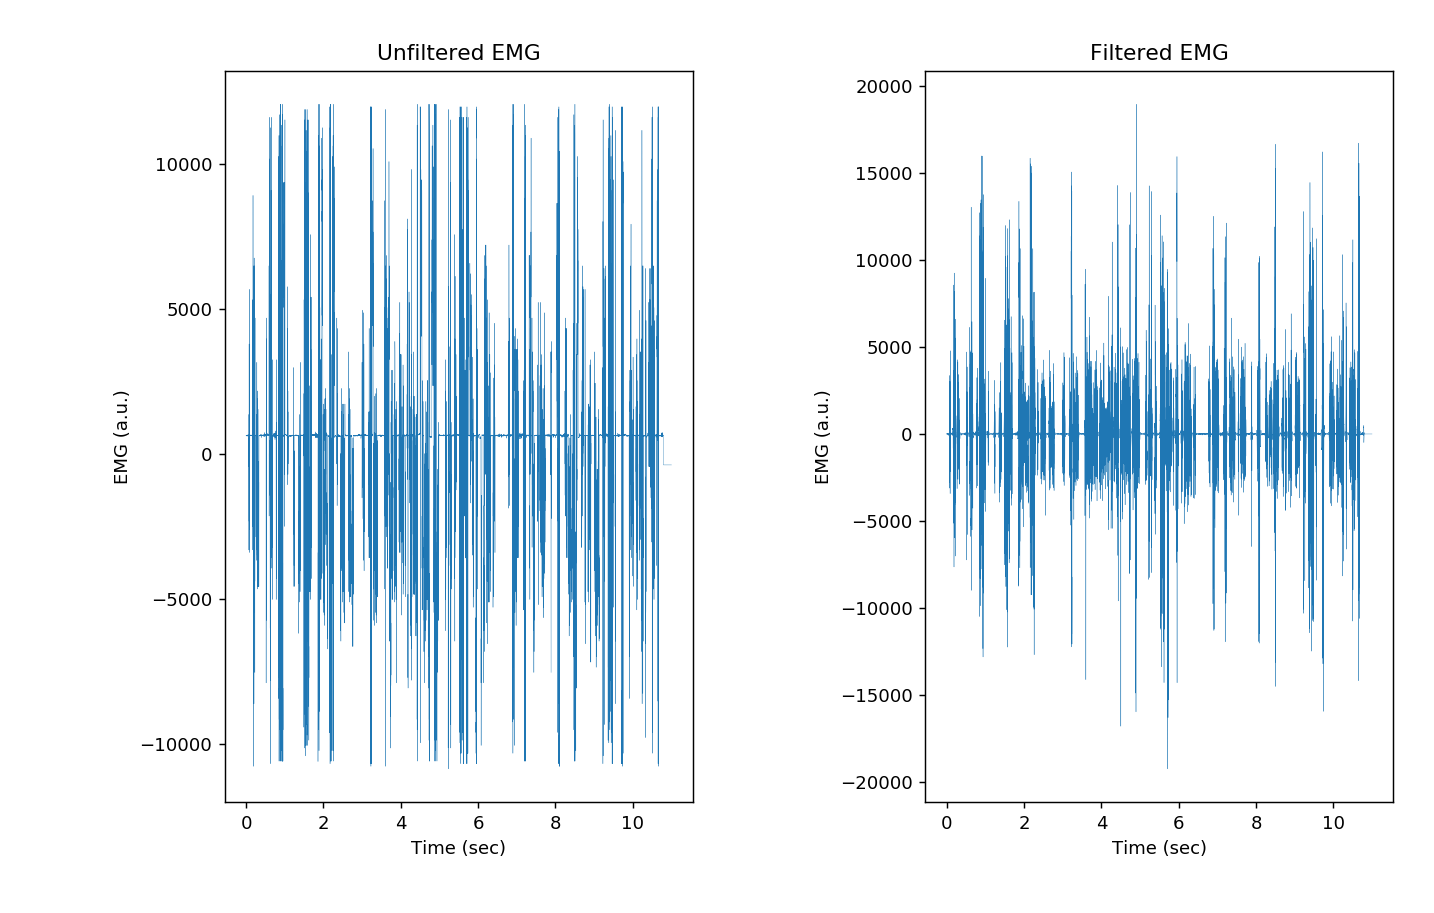

In [23]:
import scipy as sp
from scipy import signal
emg_correctmean = np.array(df['BF'])
time = np.array(df['Time'])
# create bandpass filter for EMG
high = 20./(1000./2.)
low = 450./(1000./2.)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_correctmean, linewidth=0.2)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered, linewidth=0.2)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

<IPython.core.display.Javascript object>


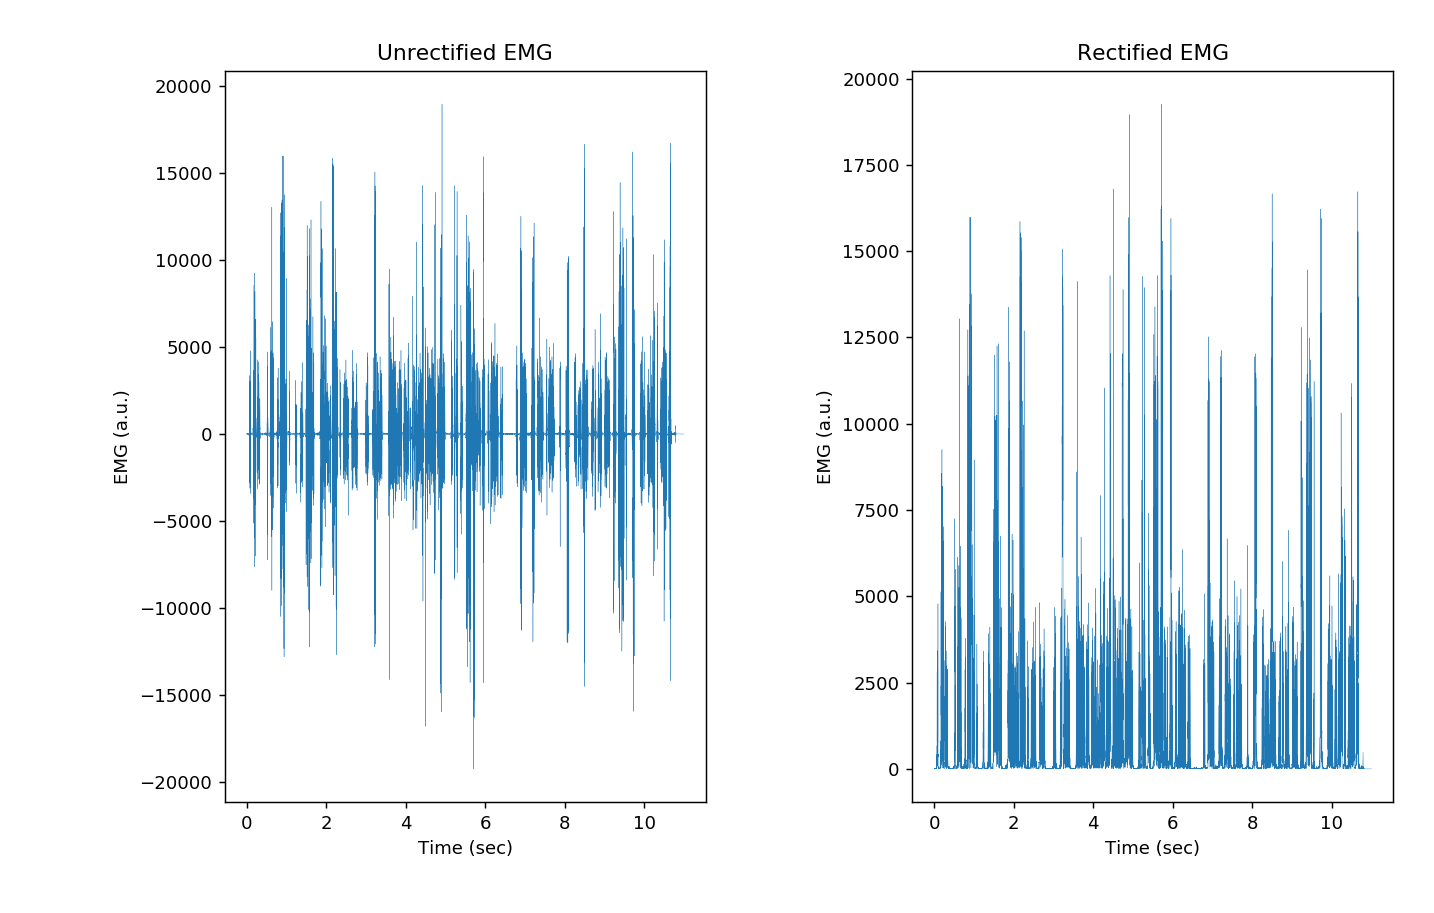

In [24]:
# process EMG signal: rectify
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unrectified EMG')
plt.plot(time, emg_filtered, linewidth=0.2)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Rectified EMG')
plt.plot(time, emg_rectified, linewidth=0.2)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

<IPython.core.display.Javascript object>


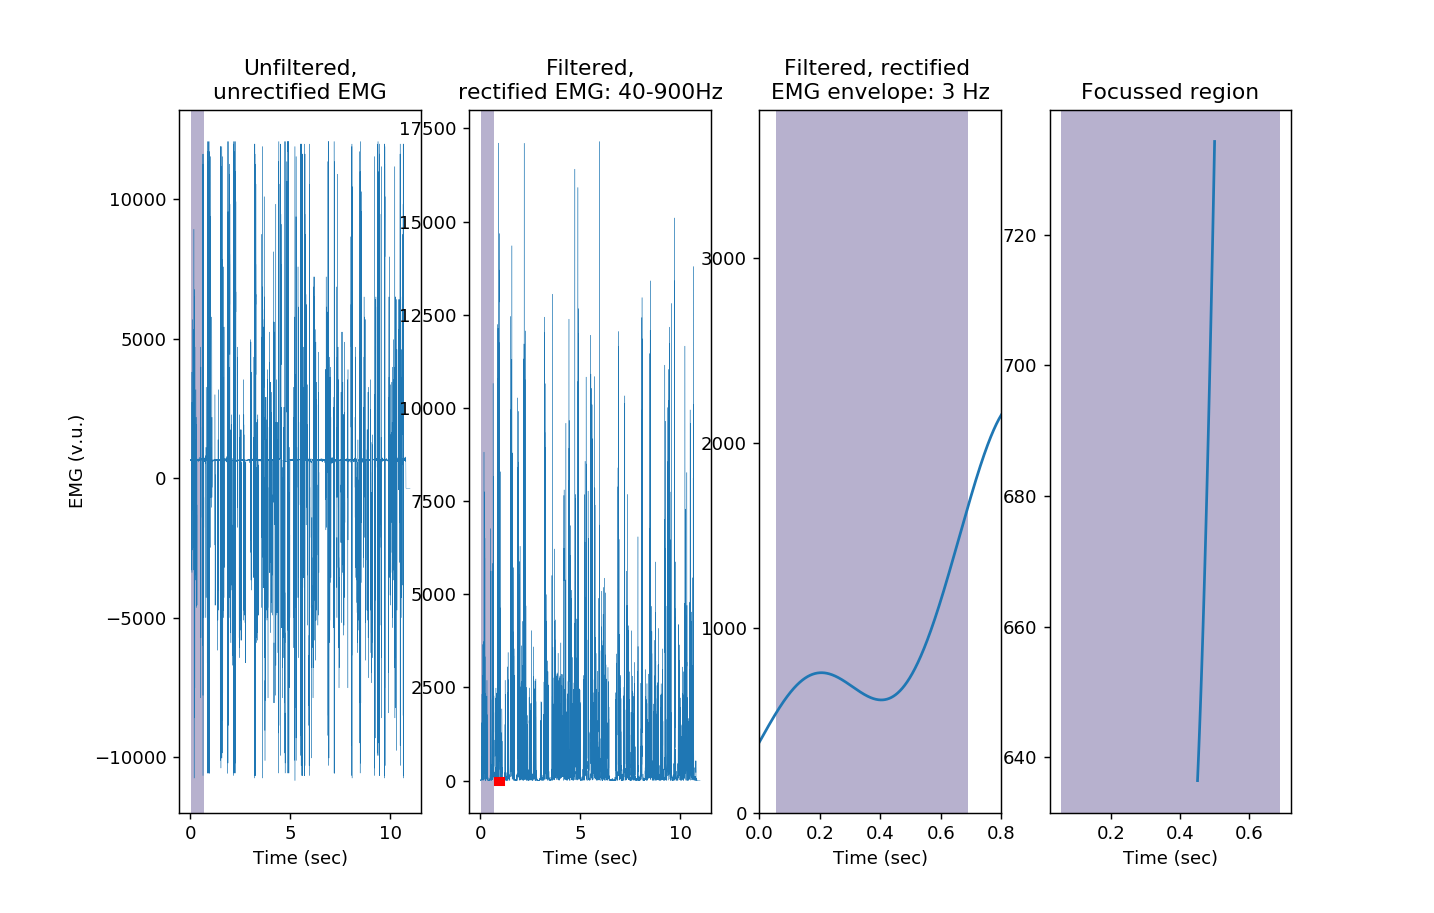

<IPython.core.display.Javascript object>


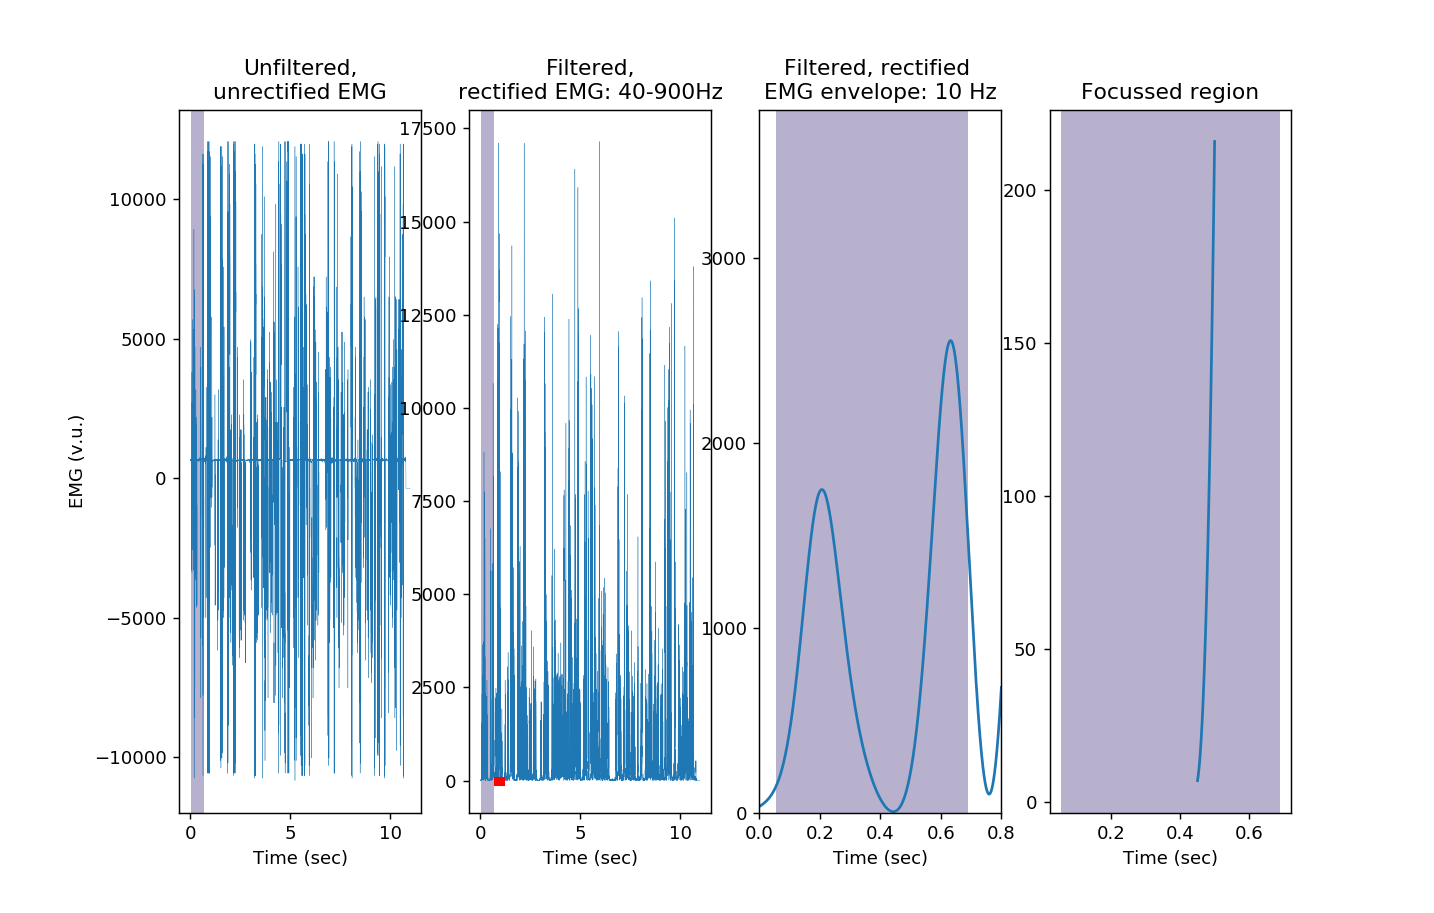

<IPython.core.display.Javascript object>


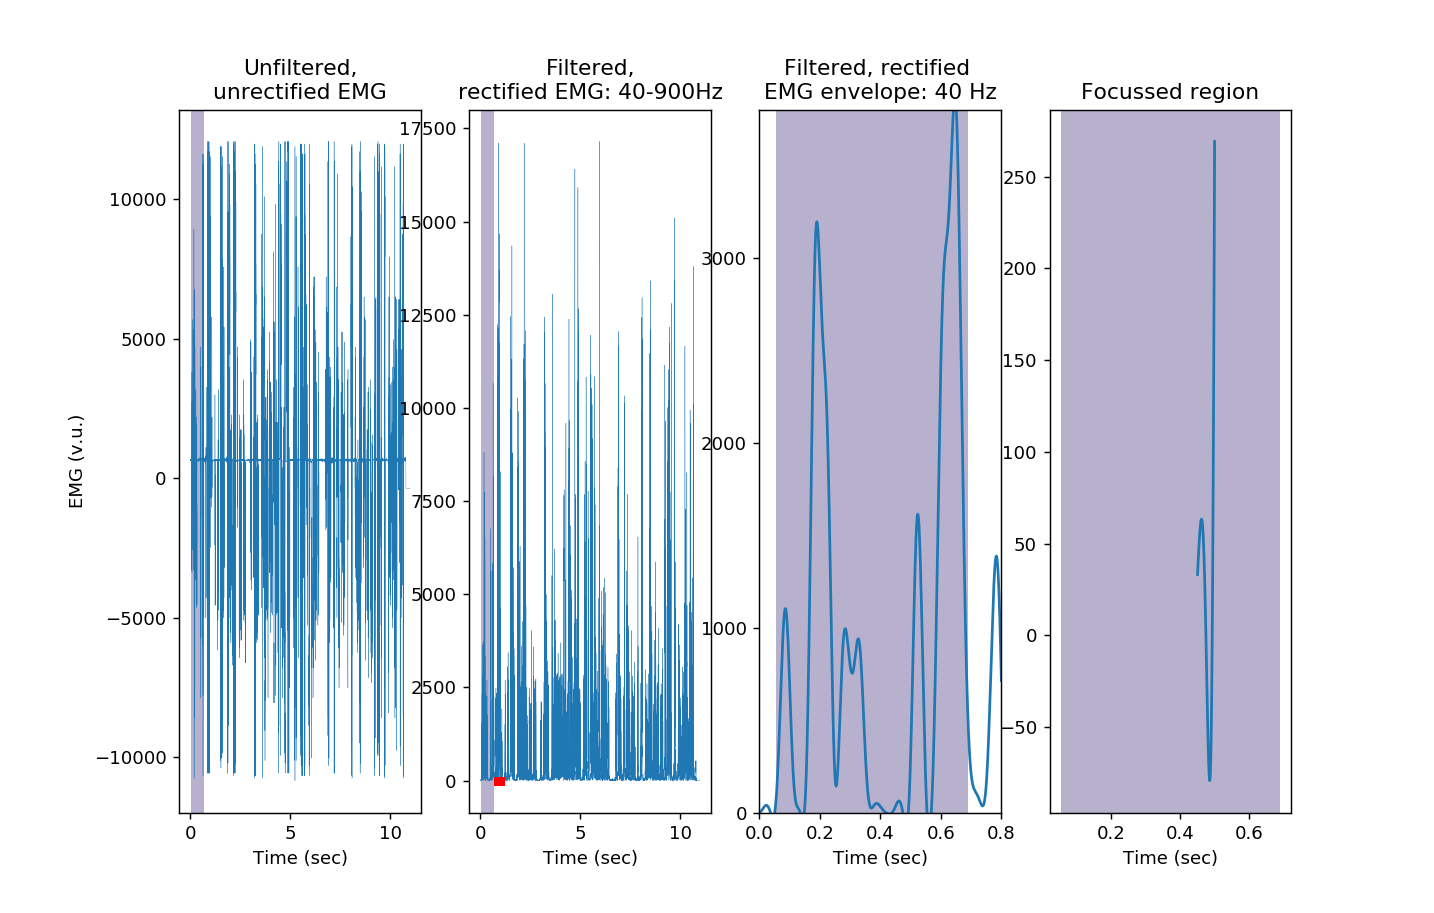

In [25]:
def filteremg(time, emg, low_pass=10., sfreq=2000., high_band=20., low_band=450.):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg, linewidth=0.2)
    p = plt.axvspan(0.0530, 0.6900, facecolor='#70659e', alpha=0.5)
    plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (v.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified, linewidth=0.2)
    p = plt.axvspan(0.0530, 0.6900, facecolor='#70659e', alpha=0.5)
    plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    p = plt.axvspan(0.0530, 0.6900, facecolor='#70659e', alpha=0.5)
    plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlim(0.0, 0.8)
    plt.ylim(0, 3800)

    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(time[int(0.9*1000):int(1.0*1000)], emg_envelope[int(0.9*1000):int(1.0*1000)])
    p = plt.axvspan(0.0530, 0.6900, facecolor='#70659e', alpha=0.5)
    plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [3, 10, 40]:
    filteremg(df['Time'], emg_correctmean, low_pass=i)

In [10]:
df['Time'][105:1381]

105     0.0525
106     0.0530
107     0.0535
108     0.0540
109     0.0545
110     0.0550
111     0.0555
112     0.0560
113     0.0565
114     0.0570
115     0.0575
116     0.0580
117     0.0585
118     0.0590
119     0.0595
120     0.0600
121     0.0605
122     0.0610
123     0.0615
124     0.0620
125     0.0625
126     0.0630
127     0.0635
128     0.0640
129     0.0645
130     0.0650
131     0.0655
132     0.0660
133     0.0665
134     0.0670
         ...  
1351    0.6755
1352    0.6760
1353    0.6765
1354    0.6770
1355    0.6775
1356    0.6780
1357    0.6785
1358    0.6790
1359    0.6795
1360    0.6800
1361    0.6805
1362    0.6810
1363    0.6815
1364    0.6820
1365    0.6825
1366    0.6830
1367    0.6835
1368    0.6840
1369    0.6845
1370    0.6850
1371    0.6855
1372    0.6860
1373    0.6865
1374    0.6870
1375    0.6875
1376    0.6880
1377    0.6885
1378    0.6890
1379    0.6895
1380    0.6900
Name: Time, dtype: float64

<IPython.core.display.Javascript object>


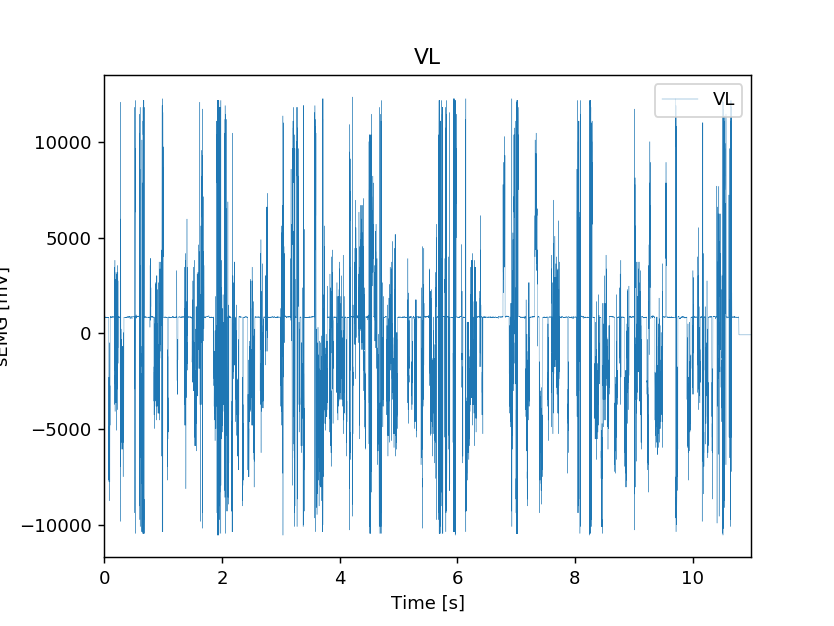

<IPython.core.display.Javascript object>


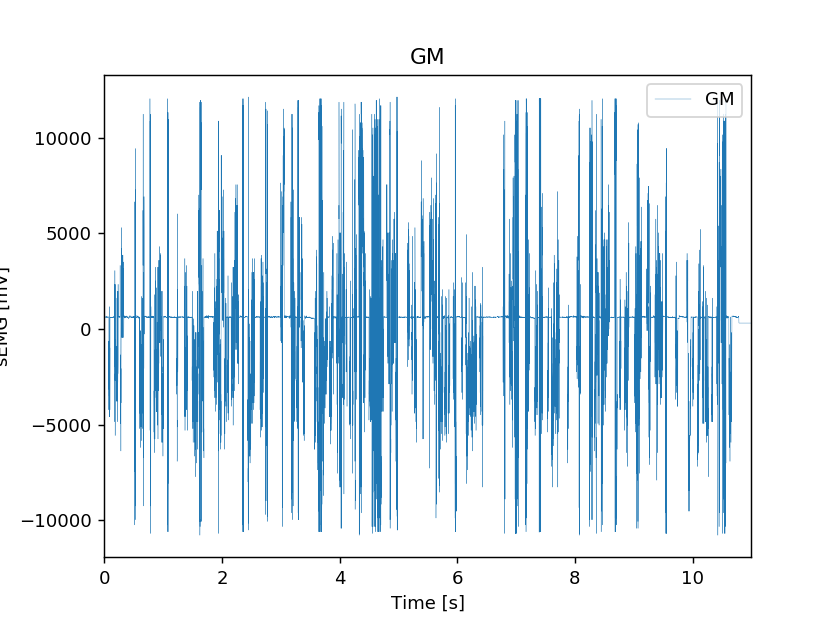

<IPython.core.display.Javascript object>


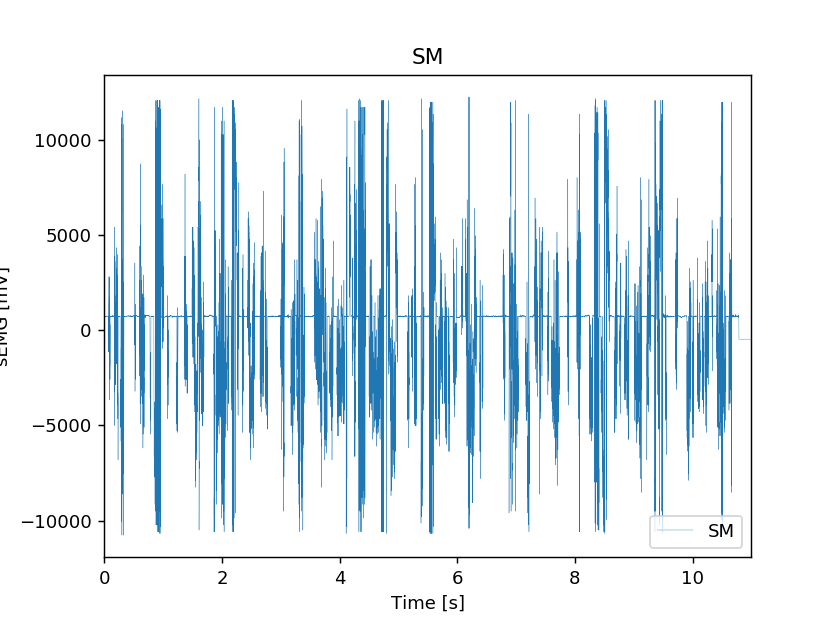

<IPython.core.display.Javascript object>


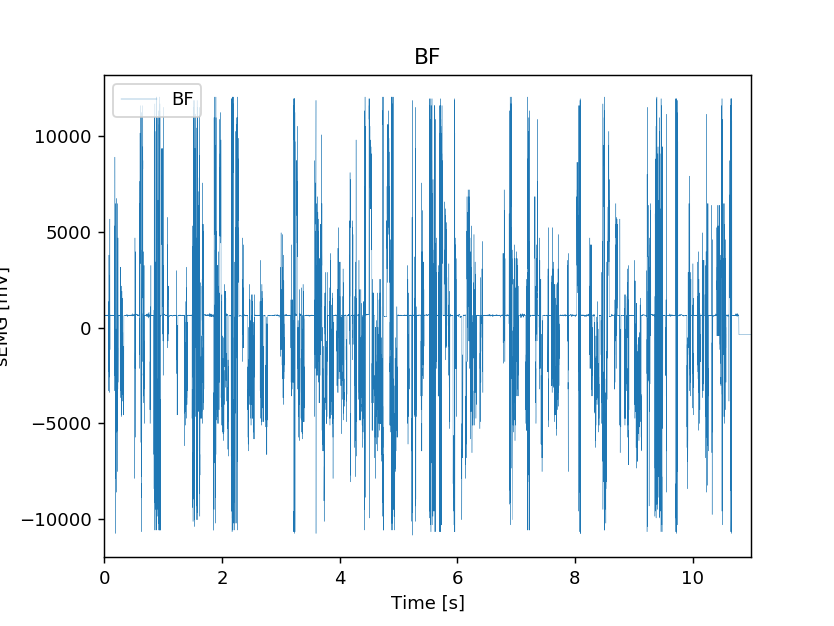

In [26]:
#%whos
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

###############################################################################################
# import jtplot
#from jupyterthemes import jtplot

# you can select an alternative theme's plot style by name
# oceans16 | grade3 | chesterish | onedork | monokai | solarizedl
#jtplot.style('onedork')
###############################################################################################

df.plot(x='Time', y='VL', linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('VL')

df.plot(x='Time', y='GM', linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('GM')

df.plot(x='Time', y='SM', linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('SM')
    
df.plot(x='Time', y='BF', linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF')

<IPython.core.display.Javascript object>


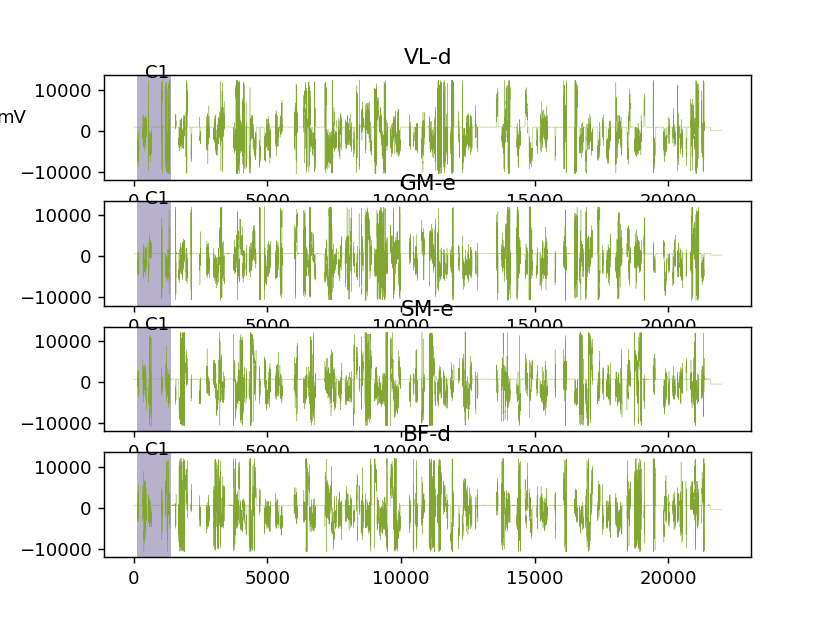

In [27]:
init_c = 106
final_c = 1380
dom = df['BF'][106:1380]

plt.figure()
ax1 = plt.subplot(4, 1, 1)#.xaxis.set_visible(False)
plt.plot(df['VL'], linewidth=0.2, color = '#81a732')
plt.xlabel('Sample')
plt.ylabel('mV').set_rotation(0)
plt.title('VL-d')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    
ax2 = plt.subplot(4, 1, 2, sharey=ax1)
plt.plot(df['GM'], linewidth=0.2, color = '#81a732')
#plt.xlabel('Sample')
#plt.ylabel('mV')
plt.title('GM-e')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))            

ax3 = plt.subplot(4, 1, 3, sharey=ax2)
plt.plot(df['SM'], linewidth=0.2, color = '#81a732')
#plt.xlabel('Sample')
#plt.ylabel('mV')
plt.title('SM-e')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))            
            
ax4 = plt.subplot(4, 1, 4, sharey=ax3)
plt.plot(df['BF'], linewidth=0.2, color = '#81a732')
#plt.xlabel('Sample')
#plt.ylabel('mV')
plt.title('BF-d')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))

In [28]:
import numpy as np
import obspy
from obspy.signal.filter import bandpass, bandstop

arr = np.array(df['BF'])
#bandpass(data, freqmin, freqmax, df, corners=4, zerophase=False)
test = obspy.signal.filter.bandpass(arr, 20, 450, 2000, corners=4, zerophase=False)

df.plot(x='Time', y='BF', linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF')

plt.figure()
plt.plot(test, linewidth=0.2)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF - Bandstop (100-200 [Hz])')

#plt.figure()
#plot_fft(test,12000)

#rms = window_rms(test,200)

#df_rms = pd.DataFrame(rms)

#df_rms.plot(linewidth=0.8)
#plt.title('RMS: BF')

ImportError: No module named obspy

<IPython.core.display.Javascript object>


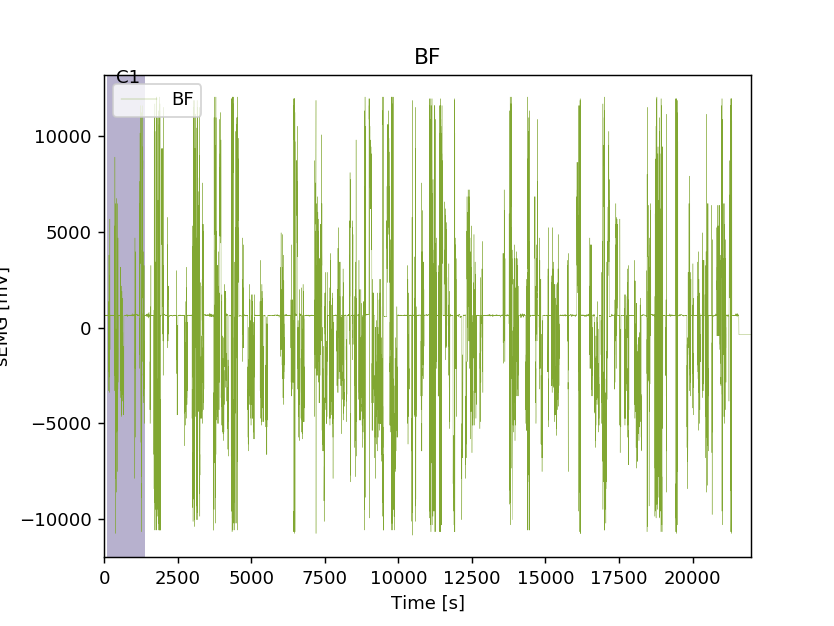

In [29]:
init_c = 106
final_c = 1380
dom = df['BF'][106:1380]

#df.plot(x='Time', y='BF', linewidth=0.2, color = '#81a732')
df.plot(y='BF', linewidth=0.2, color = '#81a732')

plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF')

#p = plt.axvspan(0.0530, 0.6900, facecolor='#70659e', alpha=0.5)
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))

<IPython.core.display.Javascript object>


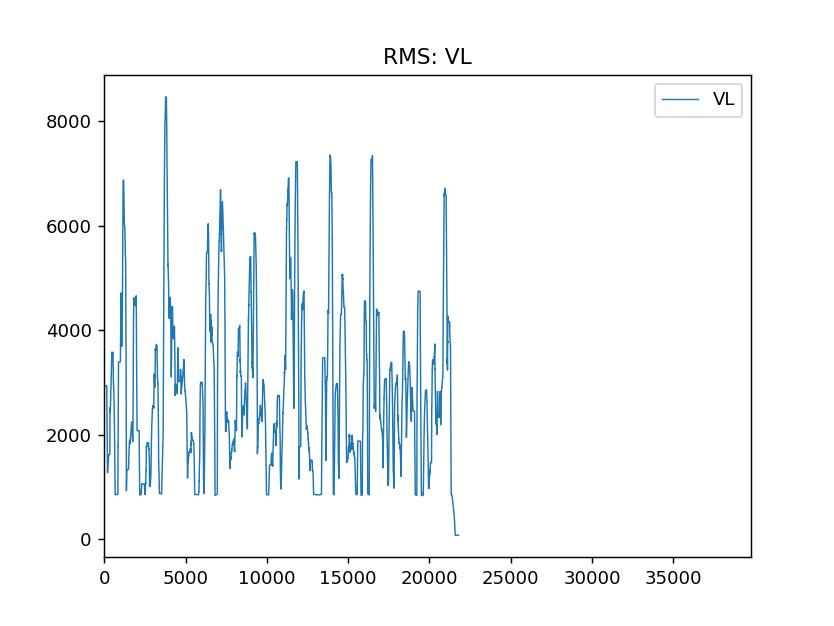

<IPython.core.display.Javascript object>


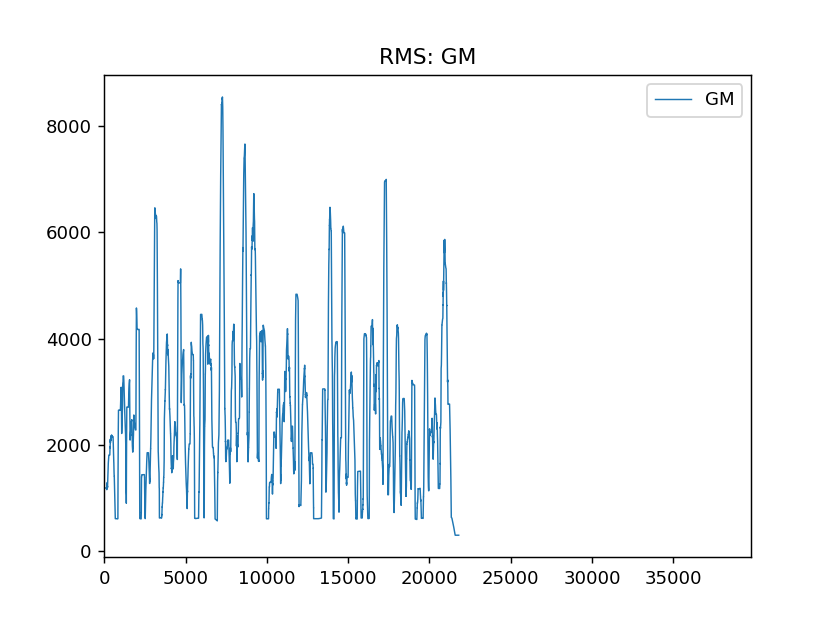

<IPython.core.display.Javascript object>


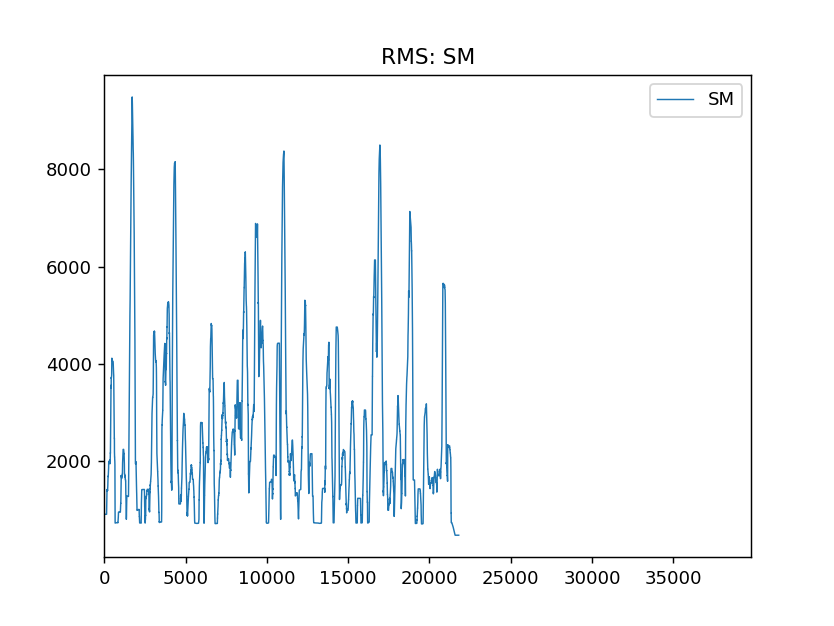

<IPython.core.display.Javascript object>


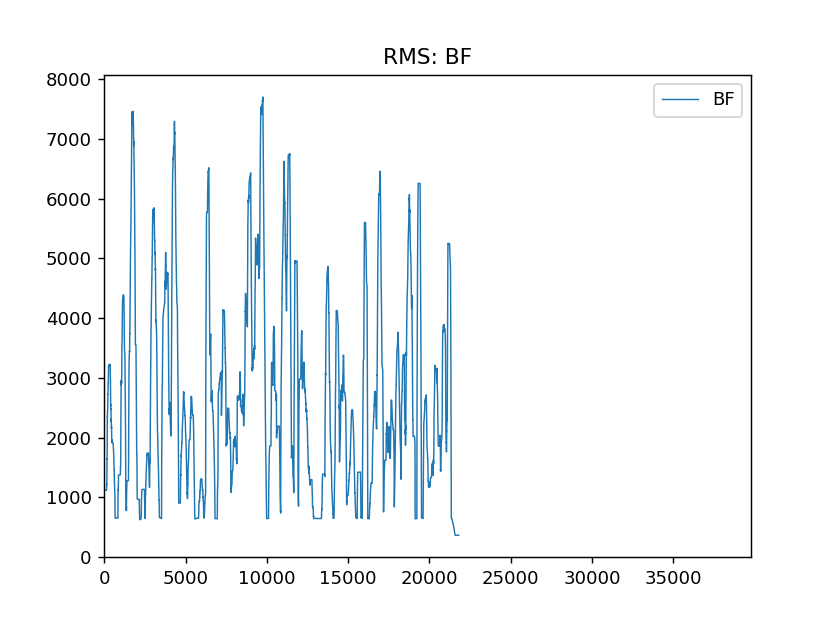

In [30]:
import numpy as np
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

def plot_fft(x, fs):
    X =np.abs(np.fft.fft(x))
    f =np.linspace(0, fs,x.shape[0])
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel("Frequency")
    plt.show()


l = ['VL', 'GM', 'SM', 'BF']

for i in l:
    u = df[i]

    rms = window_rms(u,200)

    df_rms[i] = pd.DataFrame(rms)
    
    df_rms.plot(y=i, linewidth=0.8)
    plt.title('RMS: '+i)

In [31]:
df_rms.head()

,0,VL,GM,SM,BF
0,11.024948,2929.252230,1193.464874,905.391719,1118.396281
1,11.057831,2929.264542,1193.421827,905.380506,1118.432940
2,11.090616,2929.272749,1193.400451,905.391784,1118.473714
3,11.113808,2929.299226,1193.336322,905.386140,1118.461415
4,11.136951,2929.284993,1193.300445,905.380485,1118.527356


In [32]:
df.head()

,Time,VL,GM,SM,BF
0,0.0000,852.039755,618.326952,724.501910,642.654071
1,0.0005,853.443653,609.903566,725.905804,642.654071
2,0.0010,840.808577,618.326952,728.713593,655.289149
3,0.0015,853.443653,616.923054,730.117488,645.461866
4,0.0020,850.635858,619.730849,721.694121,641.250173


In [33]:
df_rms_n['BF'] = df_rms['BF']/max(df_rms['BF'])

init_c = 106
final_c = 1380
dom = df['BF'][106:1380]

plt.figure()
ax1 = plt.subplot(2, 1, 1)#.xaxis.set_visible(False)
plt.plot(df['BF'], linewidth=0.2, color = '#81a732')
plt.xlabel('Sample')
plt.ylabel('mV').set_rotation(0)
plt.title('BF_d - RMS')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, dom.max() * 1.1))
    
ax2 = plt.subplot(2, 1, 2)
plt.plot(df_rms_n['BF'], linewidth=0.2, color = '#81a732')
#plt.xlabel('Sample')
#plt.ylabel('mV')
plt.title('BF_d - Standardization: Peak')
p = plt.axvspan(init_c, final_c, facecolor='#70659e', alpha=0.5)
plt.annotate('C1', xy=(len(dom)*.32, 1 * 0.8))   
plt.ylim(0, 1.1)

NameError: name 'df_rms_n' is not defined

In [34]:
import os
import pandas as pd

DATADIR = "DB_NG"
DATAFILE = "teste_data.txt"

datafile = os.path.join(DATADIR, DATAFILE)
df = pd.read_csv(datafile, sep=",", skiprows=1, header=None, names=['Time', 'BFF',  
                                                                    'BF'])

df = df.dropna()

df.head()

,Time,BFF,BF
0,0.0000,10.100304,-10.988602
1,0.0005,10.100304,-6.770821
2,0.0010,10.100304,-3.958967
3,0.0015,10.100304,-3.958967
4,0.0020,8.694377,-5.364894


<IPython.core.display.Javascript object>


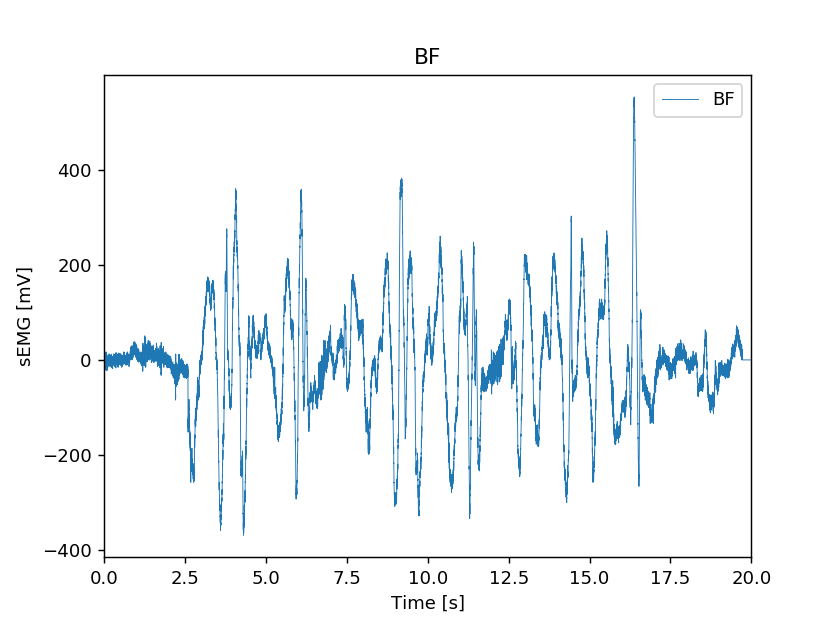

<IPython.core.display.Javascript object>


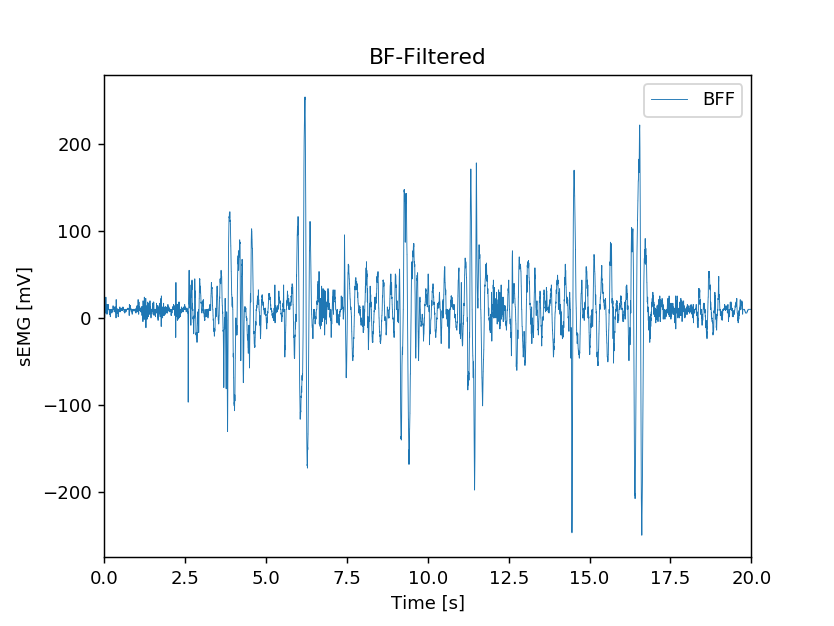

In [35]:
df.plot(x='Time', y='BF', linewidth=0.5)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF')

df.plot(x='Time', y='BFF', linewidth=0.5)
plt.xlabel('Time [s]')
plt.ylabel('sEMG [mV]')
plt.title('BF-Filtered')

<IPython.core.display.Javascript object>


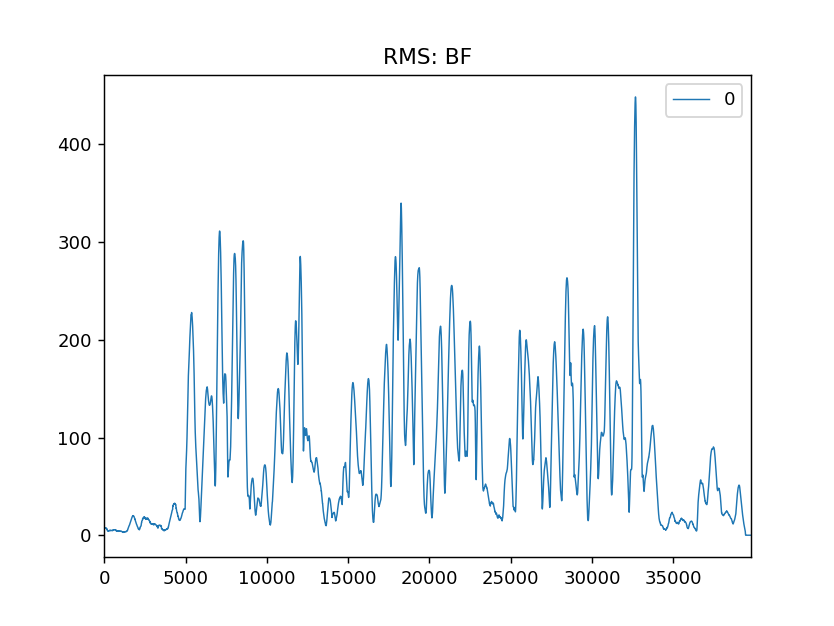

<IPython.core.display.Javascript object>


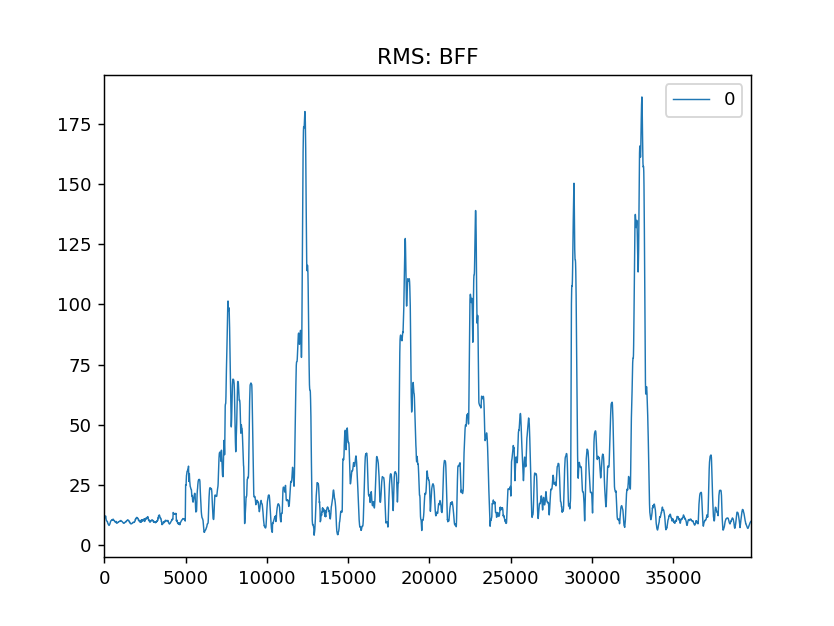

In [19]:
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))


l = ['BF', 'BFF']
for i in l:
    u = df[i]

    rms = window_rms(u,200)

    df_rms = pd.DataFrame(rms)

    df_rms.plot(linewidth=0.8)
    plt.title('RMS: '+i)